Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Basic Operations - Segmentation¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 4, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

<div style="background-color: Lavender">*pffff*

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

<div style="background-color: Lavender">*$exp(x)$ is defined as the exponential series which can simply be applied to all numbers for which potentiation is defined. With complex numbers this means that one can potentiate 2d-vectors.*</div>

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

<div style="background-color: Lavender">*This function has a real and an imaginary part, $\cos(x)$ and $\sin(x)$, respectively. $e^{2\pi i \frac{m}{n}}$ are the values from $1$ (at $m=0$), down to $-1$ at $m=\frac{n}{2}$ and back up to $1$ at $m=n$. For the imaginary part, the values range from $0$ up to $1$ and down to $0$ again. The real and imaginary part together form a point on the unit circle.*</div>


## Assignment 1: Histogram-based segmentation [6 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

<div style="background-color: Lavender">*For histogram segmentation we try to find a threshold for the histogram, ideally between the modes of a multimodal distribution and cut the image into several parts. Ideally, this would give us the background as one segment and the foreground as multiple segments. Each segment is thus the set of pixels between two histogram cutoff points. Obviously, this will fail if segments are not separable by brightness or if there is smooth brightness gradients in the image, since it will be hard to locate cutoff points. If parts of the image containing one segment differ in brightness, we are also unable to segment this thing correctly with only on threshold.*</div>

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scipy and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

<div style="background-color: Lavender">*There don't seem to be any such functions in `scipy`. Maybe you mean `skimage` which contains `threshold_otsu` and `threshold_adaptive`.*</div>

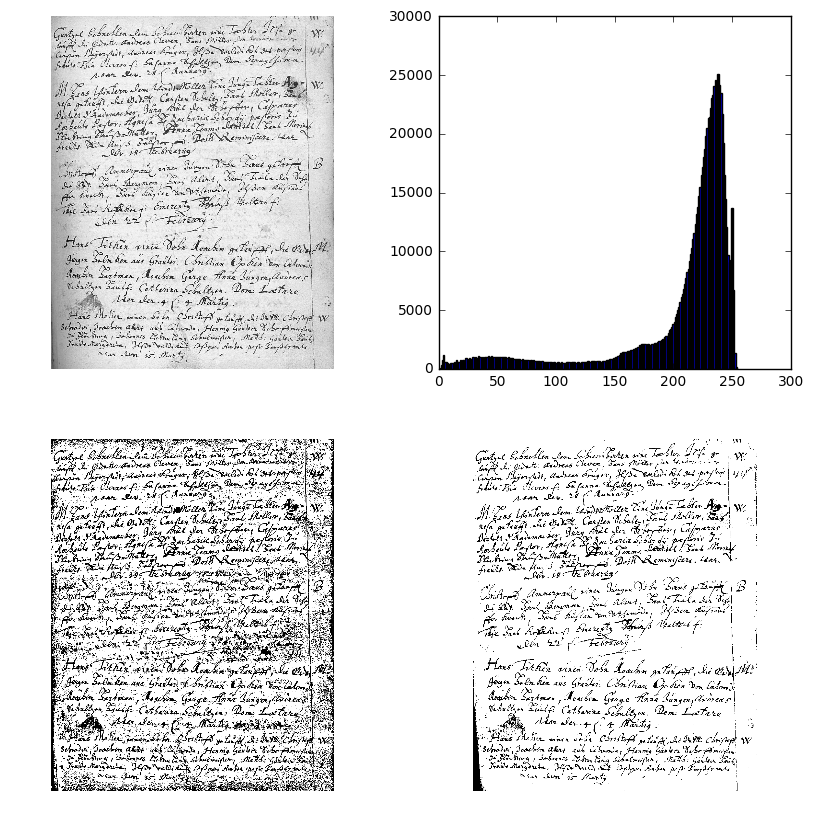

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import skimage.filters as filters
import numpy as np

img = misc.imread('schrift.png', mode='L') # 'schrift.png' or 'pebbles.jpg'

segments = filters.threshold_adaptive(img, 91) # window size depends on images size
segments2 = img > filters.threshold_isodata(img)

plt.figure(figsize=(10, 10))
plt.gray()
plt.subplot(2,2,1); plt.axis('off'); plt.imshow(img)
plt.subplot(2,2,2); plt.hist(img.flatten(),256,(0,255))
plt.subplot(2,2,3); plt.axis('off'); plt.imshow(segments)
plt.subplot(2,2,4); plt.axis('off'); plt.imshow(segments2)
plt.show()

# c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`.


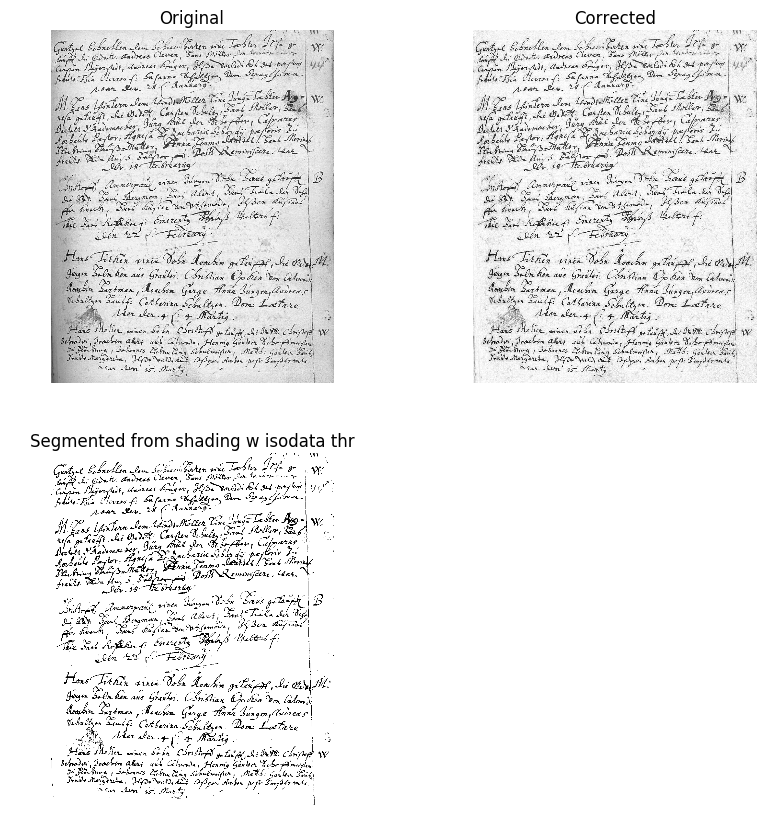

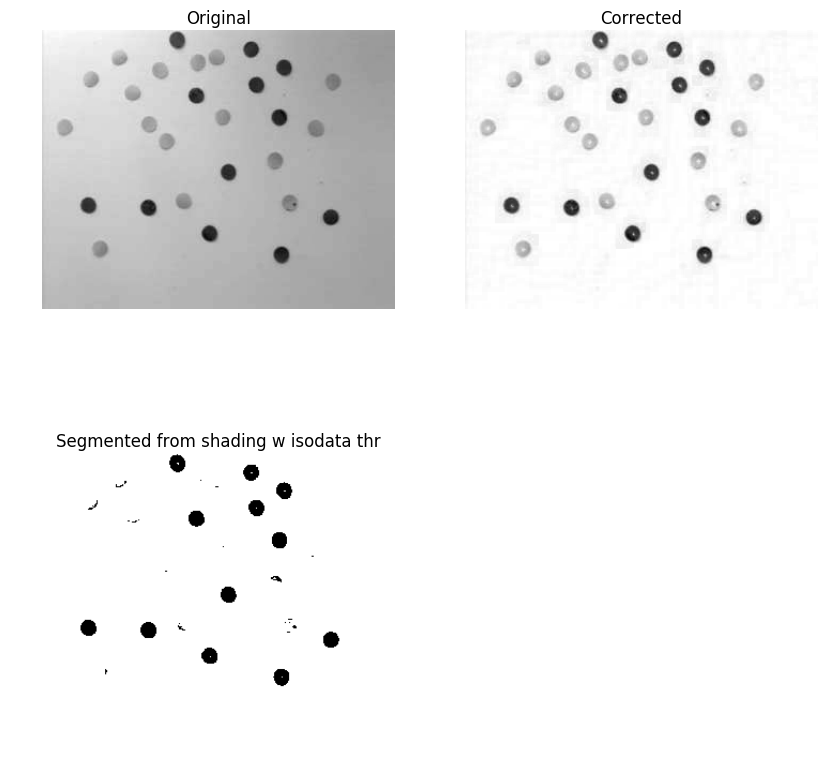

In [2]:
schrift = misc.imread('schrift.png', mode='L')
pebbles = misc.imread('pebbles.jpg', mode='L')

shading_img1 = filters.rank.maximum(schrift, np.ones((5,5)))
shading_img2 = filters.rank.maximum(pebbles, np.ones((10,10))) # the window size depends on the resolution and the size of the structures

img_corrected1 = schrift / shading_img1
img_corrected1 *= (255.0/img_corrected1.max()) # normalise
segments3 = img_corrected1 > filters.threshold_isodata(img_corrected1)

img_corrected2 = pebbles / shading_img2
img_corrected2 *= (255.0/img_corrected2.max()) # normalise
segments4 = img_corrected2 > filters.threshold_isodata(img_corrected2)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.axis('off')
plt.title('Original')
plt.imshow(schrift)
plt.subplot(2,2,2)
plt.axis('off')
plt.title('Corrected')
plt.imshow(img_corrected1)
plt.subplot(2,2,3)
plt.axis('off')
plt.title('Segmented from shading w isodata thr')
plt.imshow(segments3)
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.axis('off')
plt.title('Original')
plt.imshow(pebbles)
plt.subplot(2,2,2)
plt.axis('off')
plt.title('Corrected')
plt.imshow(img_corrected2)
plt.subplot(2,2,3)
plt.axis('off')
plt.title('Segmented from shading w isodata thr')
plt.imshow(segments4)
plt.show()

## Assignment 2: Edge-based segmentation  [6 Points]




### a) Edge linking

Describe in your own words the idea of edge linking. What is the goal? Why does it not necessarily yield closed
edge contours?

<div style="background-color: Lavender">*After computing the gradient image, one has a largely disconnected set of edge pixels. Edge linking attempts to figure out which of them belong to the same edge. It works by iterating over all unprocessed edge pixel, marking them as starting points. From a starting point, the image is scanned in the direction orthogonal to the pixel's gradient. If there is pixels in the vicinity with a similar gradient orientation and magnitude, they are merged into one egde.*

*The problem is that the thresholds for distance and gradient must be selected, which may not globally be possible for correct labeling.*</div>

### b) Zero crossings

Explain what zero crossings are. Why does the detection of zero crossings always lead to closed contours?

<div style="background-color: Lavender">*Zero crossings are the points in a line at which a signal — e.g. gray values in an image consisting of positive and negative values, e.g. in the range $[-1,1]$ — change sign.*

*If we consider a line of an image and plot it as a 1d signal, an edge will be either a plateau or a valley in the graph. The first derivative has two extrema, one at the edge onset, one at its offset. In the second derivative, both extrema become zero crossings. The pixels in between can be definitely identified as beloning to the edge which thus has no gaps. By computing the second derivative in the direction of the local gradient, one can obtain segment contours.*
</div>

### c) Zero crossings (implementation)

Provide an implementation of the zero crossing procedure described in (CV-07 slide 71). To get sensible results you should smooth the image before applying the Laplacian filter, e.g. using the Laplacian of a Gaussian (you may use buildins for the filterings steps).

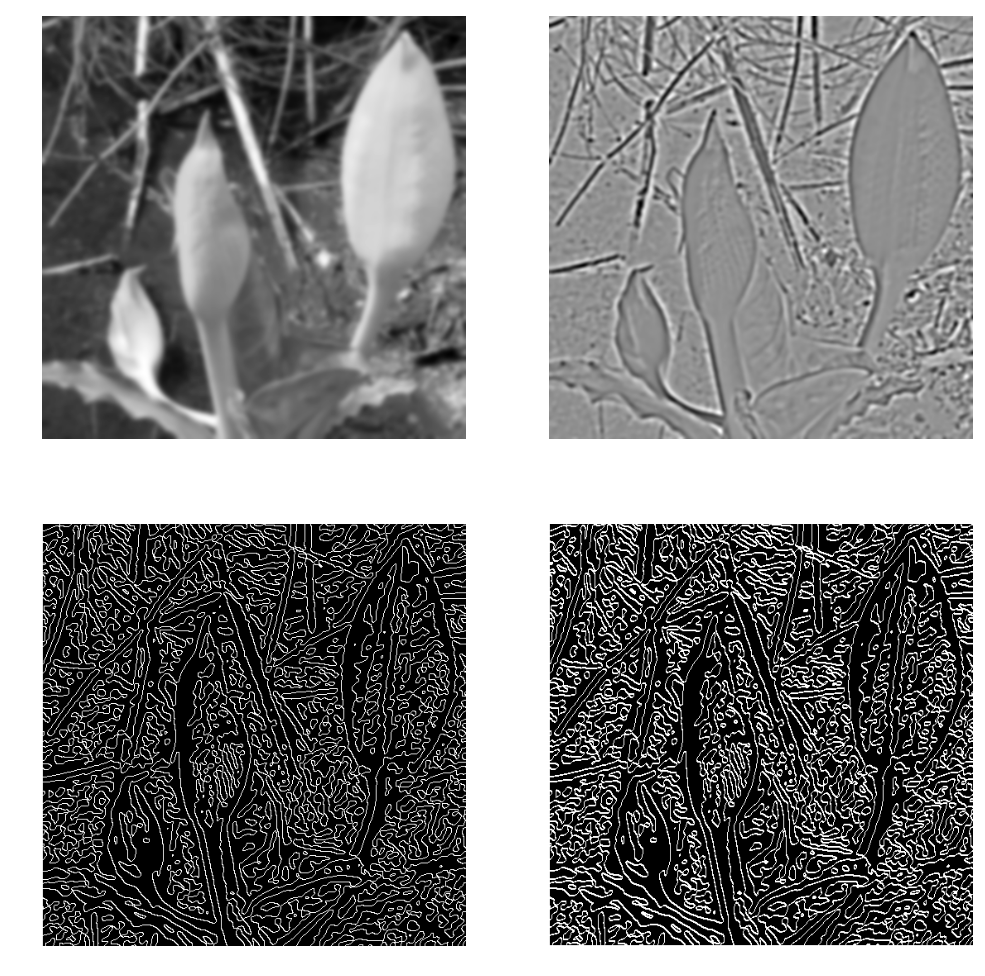

In [3]:
from scipy import misc
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

img = ndi.gaussian_filter(misc.imread('swampflower.png', mode = 'F'), 3)


# Now compute edges and then zero crossings using the 4-neighborhood and the 8-neighborhood
edges = ndi.laplace(img)

# idea: make shifted copies of edge image so that we can simply multiply them in batch to avoid loops.
shifted_x = np.zeros(edges.shape)
shifted_y = shifted_x.copy()
shifted_xy1 = shifted_x.copy()
shifted_xy2 = shifted_x.copy()

# shift edges one pixel to the right (rightmost column cut off) and the non-cut block 
# assign to shifted_x. 
# Naturally, the first column will not get any pixels
shifted_x[:, 1:] = edges[:,:-1]
# shift edges one pixel down (bottom row cut off) and assign the non-cut block
# to shifted_y.
# Naturally, the first row will not get any pixels
shifted_y[1:, :] = edges[:-1,:]
# shift edges one to the right + one pixel up (rightmost column + top row cut off)
# and assign to shifted_xy1.
# Naturally, the first column + last row will not get any pixels
shifted_xy1[:-1, 1:] = edges[1:,:-1]
# shift edges one to the right + one pixel down (rightmost column + bottom row cut off)
# and assign the non-cut block to shifted_xy2.
# Naturally, the first column + first row will not get any pixels
shifted_xy2[1:, 1:] = edges[1:,:-1]

zero_crossings_n4 = np.zeros(edges.shape)
zero_crossings_n4[(edges * shifted_x <= 0) | (edges * shifted_y <= 0)] = 1
zero_crossings_n8 = np.zeros(edges.shape)
zero_crossings_n8[(edges * shifted_x <= 0) | (edges * shifted_y <= 0)
                 | (edges * shifted_xy1 <= 0)| (edges * shifted_xy2 <= 0)] = 1

plt.figure(figsize=(12, 12))
plt.gray()

plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(edges)


plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(zero_crossings_n4)

plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(zero_crossings_n8)

plt.show()

## Assignment 3: Watershed transform  [8 Points]



### a) Watershed transform

Explain in your own words the idea of watershed transform. How do the two different approaches from the lecture work? Why does watershed transform always give a closed contour?



<div style="background-color: Lavender">*If an object has a closed boundary, this means that there must be a local gradient maximum or minimum at each point of that boundary (otherwise it would not be  a clean boundary). Since segments are defined by the ridges in the landscape, this will lead to a closed contour. Also for a clearly defined object, its edge gradients will point either all outward or inward, meaning they will create a closed basin in the gradient image. (????)*

![](http://i2.kym-cdn.com/photos/images/original/000/234/739/fa5.jpg)

</div>

### b) Implementation

Now implement the watershed transform using the flooding approach (CV-07 slide 76). Obviously, buildins for computing watershed transform are not allowed, but all other functions may be used.

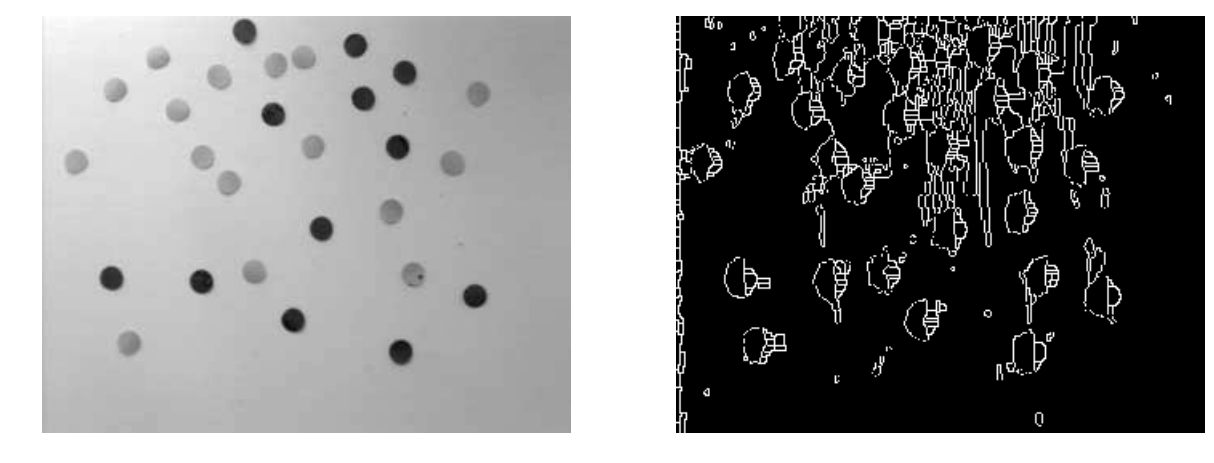

In [12]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def watershed(img, step = 1):
    """
    Perform watershed transform on a grayscale image.
    
    Args:
        img          the grayscale image
        
    Returns:
        A binary image containing the watersheds.
    """
    # I plagiarised this code from last year's matlab musterlösung, so I needed 
    # an ismemeber() function which numpy doesn't have
    def ismember(A, B):
        """Return an array of shape A.shape where each entry is 1 if the corresponding
        element is in B, 0 else"""
        res = np.zeros(A.shape, dtype=np.bool)
        for v in B:
            res[A == v] = 1
        return res

    NO_LABEL = 0
    WATERSHED = NO_LABEL + 1
    NEW_LABEL = NO_LABEL + 2

    # initialize labels
    label = np.zeros(img.shape, np.uint16)
    
    # increase water level iteratively
    for h in np.arange(img.min(), img.max()):
        count = 0 # number of new labels for one level iteration
        
        # iterate over all pixels where the value is <= h and the label is none
        # nonzero() gives a tuple of 2 lists, one with the x indeces, one with with the y indeces
        # zip them to get tuples (x,y) (* unpacks the tuple of lists into individual args)
        ind_nonzero = zip(*(((img <= h) & (label == NO_LABEL)).nonzero()))
        for x, y in ind_nonzero:

            # get indeces of neightbour region, minding the borders
            neighbour_indices = np.zeros(img.shape, dtype=np.bool)
            neighbour_indices[max(0,x-1):min(x+2, img.shape[0]),
                              max(0,y-1):min(y+2, img.shape[1])] = 1
            neighbour_indices[x,y] = 0

            # labels of all neighbours
            neighbour_labels = label[neighbour_indices]

            # unique labels of pixels already labeled/flooded among the neighbours
            flooded = np.unique(neighbour_labels[neighbour_labels > WATERSHED])
                                
            # if there are no labeled neightbours, we have a new segment
            if len(flooded) == 0:
                label[x,y] = NEW_LABEL + count
                count += 1
            # if all flooded neighbours have the same label, assign this to the
            # current pixel
            elif len(flooded) == 1:
                label[x,y] = flooded[0]
            # heterogeneous neighbourhood
            else:
                # these labels were given for a lower water level
                old = flooded[flooded < NEW_LABEL]
                # these labels were given at the current water level, but for
                # different pixels.
                new = flooded[flooded >= NEW_LABEL]

                # if all neighbours were only just flooded at this level, we
                # reaassign them all the same label (they are a neighbourhood so
                # belong together)
                if len(old) == 0:
                    label[x,y] = new[0]
                    # we pick the first label of the list to be the label for
                    # all pixels, so we replace the label array at each
                    # neighbour pixel that has a different label
                    label[ismember(label, new[1:])] = new[0]
                # if there is one neighbour that was flooded at a lover level,
                # we use its label for the newly labeled neighbours as well and
                # for the current pixel
                elif len(old) == 1:
                    label[x,y] = old[0]
                    label[ismember(label, new)] = old[0]
                # otherwise, there are multiple pixels labeled differently at
                # a lower level. This means the current pixel is at a boundary
                # between basins, and thus a watershed
                else:
                    label[x,y] = WATERSHED

        # increase NEW_LABEL, since we assigned count new labels at this level
        NEW_LABEL += count 

    return label == WATERSHED



img = misc.imread('pebbles.jpg', mode = 'L')
img_smooth = ndi.gaussian_filter(img, 2)
img_grad = np.abs(ndi.sobel(img_smooth))

plt.figure(figsize=(15,15))
plt.gray()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(watershed(img_grad))
plt.show()

### c) Application: maze

You can use watershed transform to find your way through a maze. To do so, first apply a distance transform to the maze and the flood the result. The watershed will show you the way through the maze. Explain why this works.

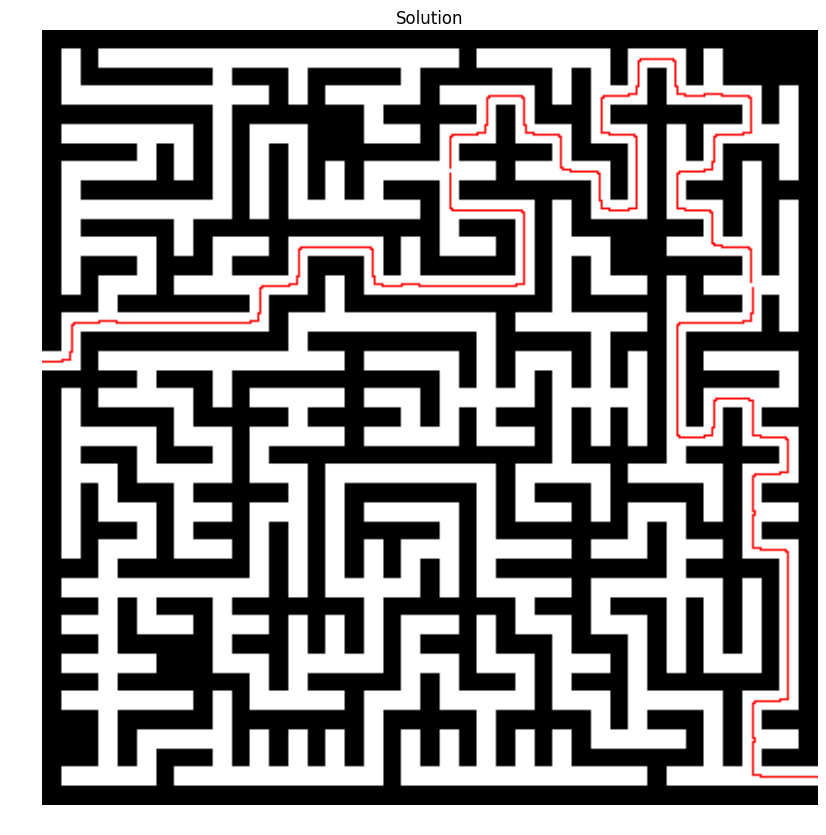

In [13]:
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import distance_transform_edt

img = misc.imread('maze2.png', mode = 'L') # 'maze1.png' or 'maze2.png'

result = img[:,:,np.newaxis].repeat(3, 2)
result[watershed(distance_transform_edt(img)),1:3] = 0

plt.figure(figsize=(10, 10))
plt.title('Solution')
plt.axis('off')
plt.gray()
plt.imshow(result)
plt.show()
